<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4/blob/master/PJI4_UBS_VilaEde_QA_SRGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar Bibliotecas

In [2]:
!pip install openpyxl
!pip install pyexcel
!pip install sweetviz
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 KB 5.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 78.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar pacotes

In [3]:
import pandas as pd
#from google.colab import files
import io
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

Código para upload de arquivo instalado no computador

In [ ]:
#uploaded = files.upload()

Referenciar base de dados existente rede

In [4]:
url_SG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/SRAG_SubP_SP.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/Santana_SP_AQI.xlsx'

Criar Dataframes

In [20]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SG, engine='openpyxl')
df2

,COVID19 S�ndrome Respirat�ria Aguda Grave (SRAG),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,N� de Casos por Ano M�s Dia Notifica��o e Subp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Per�odo:2020-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ano M�s Dia Notifica��o,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,16/03/2023,-,-,1,-,-,-,-,-,-,...,-,-,-,1,-,-,-,-,-,2
1164,Total,7630,11025,16107,14646,7806,10027,3824,5003,9601,...,9117,8919,6802,13368,8270,10806,7011,8556,130,301198
1165,Fonte: SIVEP GRIPE/DVE/COVISA/SMS-SP. Data de ...,sujeitos a altera��o.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,Nota:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Definir a linha zero do dataframe 1 como título das colunas

In [15]:
df1
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))
df1

,date,pm25,pm10,o3,no2,so2,co
1,2023/3/8,35,,24,,,
2,2023/3/9,47,,2,,,
3,2023/3/10,50,,18,,,
4,2023/3/11,52,,23,,,
5,2023/3/12,37,,14,,,
...,...,...,...,...,...,...,...
3267,2014/11/24,,,24,,,
3268,2014/11/25,,,28,,,
3269,2014/1/1,,,22,,,
3270,2019/2/10,,,,9,,


Definindo a primeira coluna como data com padrão Português do Brasil

In [16]:
df_QA = df1
df_QA['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_Brasil = df_QA.iloc[:, -1]
df_QA = df_QA.iloc[:, 1:-1]
df_QA.insert(loc=0, column='Data', value=col_Data_Brasil)
df_QA

,Data,pm25,pm10,o3,no2,so2,co
1,08/03/2023,35,,24,,,
2,09/03/2023,47,,2,,,
3,10/03/2023,50,,18,,,
4,11/03/2023,52,,23,,,
5,12/03/2023,37,,14,,,
...,...,...,...,...,...,...,...
3267,24/11/2014,,,24,,,
3268,25/11/2014,,,28,,,
3269,01/01/2014,,,22,,,
3270,10/02/2019,,,,9,,


Remover linhas desnecessárias e renomear coluna do dataframe 2

In [21]:
df_SRAG = df2
df_SRAG.columns = df_SRAG.iloc[2]
linhas_remover = list(range(0,3)) + list(range(1164,1168))
df_SRAG = df_SRAG.reindex(df_SRAG.index.drop(linhas_remover))
df_SRAG = df_SRAG.rename(columns={'Ano M�s Dia Notifica��o': 'Data'})
df_SRAG

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
5,03/01/2020,-,-,2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,3
6,05/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
7,06/01/2020,-,1,1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,12/03/2023,-,-,3,-,-,1,-,1,-,...,-,1,-,2,1,1,1,3,-,21
1160,13/03/2023,2,1,8,3,2,-,-,-,7,...,2,1,2,6,2,10,-,2,-,94
1161,14/03/2023,1,5,13,2,-,3,-,2,1,...,-,-,2,6,5,8,2,1,-,91
1162,15/03/2023,5,7,1,1,1,1,-,-,3,...,2,1,3,1,2,2,1,4,-,82


Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [26]:
df_SRAG = df_SRAG.loc[:, ['Data', 'VILA MARIA/VILA GUILHERME', 'Total']]
df_base = pd.merge(df_QA, df_SRAG, how='inner', on='Data')

Definir uma data de corte

In [27]:
data_limite = '01/01/2020'
#df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Analisar o conteúdo e os tipos de dados do dataframe base

In [28]:
df_base.describe()

,Data,pm25,pm10,o3,no2,so2,co,VILA MARIA/VILA GUILHERME,Total
count,1126,1126,1126,1126,1126,1126,1126,1126,1126
unique,1126,109,1,72,1,1,1,40,532
top,08/03/2023,,,15,,,,-,1
freq,1,94,1126,44,1126,1126,1126,164,11


In [29]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1126
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data                       1126 non-null   object
 1    pm25                      1126 non-null   object
 2    pm10                      1126 non-null   object
 3    o3                        1126 non-null   object
 4    no2                       1126 non-null   object
 5    so2                       1126 non-null   object
 6    co                        1126 non-null   object
 7   VILA MARIA/VILA GUILHERME  1126 non-null   object
 8   Total                      1126 non-null   object
dtypes: object(9)
memory usage: 88.0+ KB


Renomear colunas com titulo extenso e converter strings em tipos numericos

In [30]:
df_base = df_base.rename(columns={'VILA MARIA/VILA GUILHERME': 'VM_SRAG', 'Total':'Total_SRAG'})
df_base['pm25'] = pd.to_numeric(df_base[' pm25'], errors='coerce')
df_base['pm10'] = pd.to_numeric(df_base[' pm10'], errors='coerce')
df_base['o3'] = pd.to_numeric(df_base[' o3'], errors='coerce')
df_base['no2'] = pd.to_numeric(df_base[' no2'], errors='coerce')
df_base['VM_SRAG'] = pd.to_numeric(df_base['VM_SRAG'], errors='coerce')
df_base['Total_SRAG'] = pd.to_numeric(df_base['Total_SRAG'], errors='coerce')

In [31]:
df_base.describe()

,VM_SRAG,Total_SRAG,pm25,pm10,o3,no2
count,962.000000,1126.000000,1032.000000,0.0,1109.000000,0.0
mean,8.233888,256.592362,52.304264,NaN,27.007214,NaN
std,7.283209,221.783321,22.693557,NaN,12.613096,NaN
min,1.000000,1.000000,5.000000,NaN,1.000000,NaN
25%,3.000000,85.000000,36.000000,NaN,18.000000,NaN
50%,6.000000,188.500000,49.000000,NaN,26.000000,NaN
75%,12.000000,379.250000,64.250000,NaN,33.000000,NaN
max,48.000000,1200.000000,245.000000,NaN,88.000000,NaN


In [33]:
df_base.head()

,Data,pm25,pm10,o3,no2,so2,co,VM_SRAG,Total_SRAG,pm25,pm10,o3,no2
0,08/03/2023,35,,24,,,,3.0,64,35.0,NaN,24.0,NaN
1,09/03/2023,47,,2,,,,NaN,62,47.0,NaN,2.0,NaN
2,10/03/2023,50,,18,,,,NaN,65,50.0,NaN,18.0,NaN
3,11/03/2023,52,,23,,,,2.0,14,52.0,NaN,23.0,NaN
4,12/03/2023,37,,14,,,,1.0,21,37.0,NaN,14.0,NaN


In [32]:
df_base.tail()

,Data,pm25,pm10,o3,no2,so2,co,VM_SRAG,Total_SRAG,pm25,pm10,o3,no2
1122,24/03/2020,,,20,,,,22.0,503,NaN,NaN,20.0,NaN
1123,25/03/2020,,,28,,,,18.0,490,NaN,NaN,28.0,NaN
1124,26/03/2020,,,33,,,,17.0,547,NaN,NaN,33.0,NaN
1125,27/03/2020,,,30,,,,20.0,603,NaN,NaN,30.0,NaN
1126,28/03/2020,,,35,,,,6.0,294,NaN,NaN,35.0,NaN


Utilizar o sweetviz para gerar um relatório com as estatísticas dos dados

In [ ]:
relatorio = sv.analyze(df_base, pairwise_analysis='off')
relatorio.show_html('Relatorio.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Preencher os valores NaN (não numéricos) com a média de cada variável

In [ ]:
df_base[' pm25'].fillna(value=df_base[' pm25'].mean(), inplace=True)
df_base[' pm10'].fillna(value=df_base[' pm10'].mean(), inplace=True)
df_base[' o3'].fillna(value=df_base[' o3'].mean(), inplace=True)
df_base[' no2'].fillna(value=df_base[' no2'].mean(), inplace=True)
df_base['IT_SG'].fillna(value=df_base['IT_SG'].mean(), inplace=True)
df_base['SM_SG'].fillna(value=df_base['SM_SG'].mean(), inplace=True)
df_base['Total_SG'].fillna(value=df_base['Total_SG'].mean(), inplace=True)

Gerar uma matriz de correlação entre as variáveis do dataframe base

In [ ]:
corr_matriz1 = df_base.corr()

Plotar o Mapa de Calor com as correlações calculadas

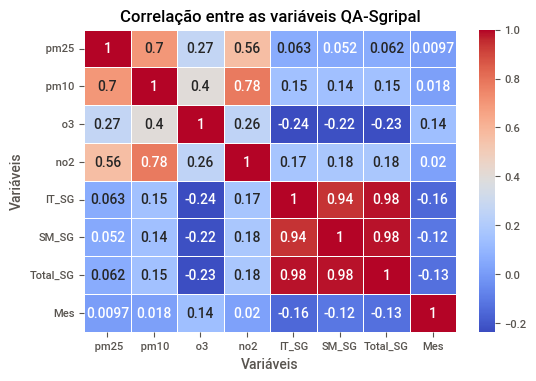

In [ ]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis QA-Sgripal')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Plotar gráfico com dados do dataframe ao longo dos anos de 2020 a 2023.

In [ ]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [ ]:
df_base.dtypes

Data        datetime64[ns]
 pm25              float64
 pm10              float64
 o3                float64
 no2               float64
 so2                object
 co                 object
IT_SG              float64
SM_SG              float64
Total_SG             int64
Mes                  int64
dtype: object

Ajustando um dataframe ordenado por ano, com a soma de todos os casos por mês

In [ ]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['Total_SG'].sum()

In [ ]:
df_base_mmAAAA

Data  Data
2020  1          45
      2           3
      3         201
      4        3845
      5        9317
      6       18513
      7       20455
      8       15364
      9       11079
      10      11043
      11      11927
      12      14653
2021  1       17772
      2       15698
      3       33019
      4       19760
      5       22069
      6       20682
      7       14704
      8       15547
      9       11290
      10       7645
      11       3267
      12       9927
2022  1       12886
      2       10218
      3        6605
      4        4379
      5        5832
      6        7923
      7       11915
      8        6627
      9        4252
      10       2995
      11      11524
      12       7190
2023  1        3361
      2        3973
      3         294
Name: Total_SG, dtype: int64

Plotando gráfico de internação por mês/ano

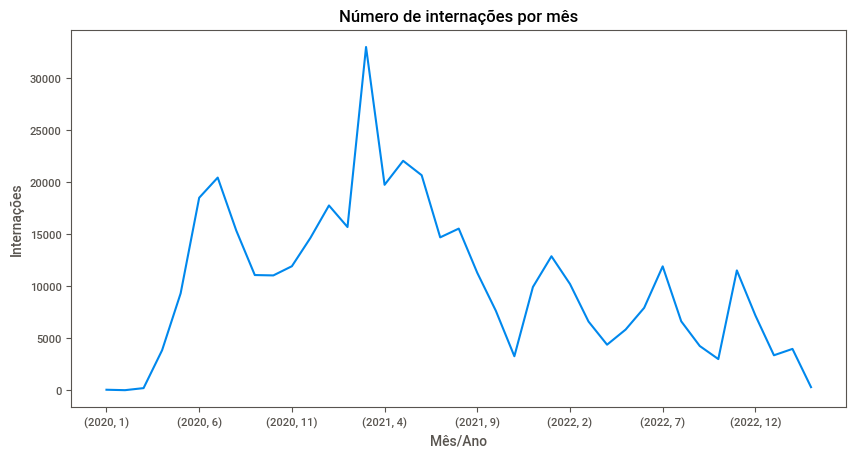

In [ ]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()

In [ ]:
# Substituir NaN pela mediana
#mediana = df['Atributo1'].median()
#df['Atributo1'].fillna(mediana, inplace=True)

# Substituir NaN pela moda
#moda = df['Atributo1'].mode()[0] # O método mode() retorna uma série, pegamos o primeiro elemento
#df['Atributo1'].fillna(moda, inplace=True)
